In [13]:
import cv2 as cv
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from object_masking import ObjectMasking

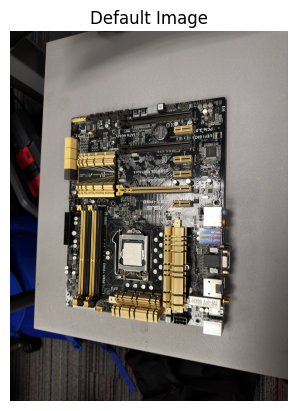

In [14]:
# Create image path var
image_dir = os.path.join("..", "images")
image_name = "motherboard_image.JPEG"
image_path = os.path.join(image_dir, image_name)

# Load the image
image = cv.imread(image_path)

# Conver to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_image = cv.equalizeHist(gray_image)

# Show the image
ObjectMasking.plot_cv_image(image, title="Default Image")

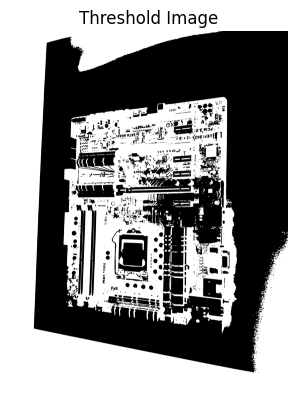

In [15]:
# Apply thresholding
blurred_image = cv.GaussianBlur(gray_image, (21, 21), 0)
_, thresh_image = cv.threshold(blurred_image, 127, 255, cv.THRESH_BINARY_INV)

# Show the image
ObjectMasking.plot_cv_image(thresh_image, title="Threshold Image")

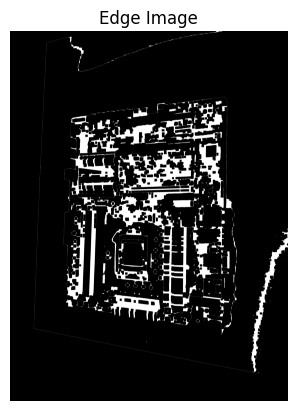

In [16]:
# Detect edges
edges = cv.Canny(thresh_image, 50, 150)

# Fill gaps in edges
kernel = np.ones((31, 31), np.uint8)  # Define a kernel for the morphological operation
closed_edges = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

# Show the image
ObjectMasking.plot_cv_image(closed_edges, title="Edge Image")

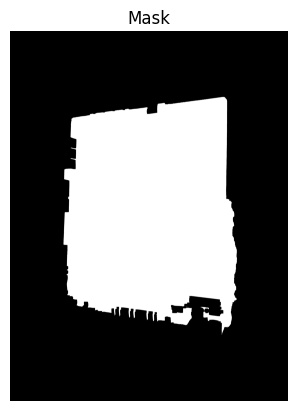

In [17]:
# Find contours
contours, _ = cv.findContours(closed_edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest_contour = max(contours, key=cv.contourArea)

# Create a blank mask
mask = np.zeros_like(gray_image)

# Draw contours on the mask
cv.drawContours(mask, [largest_contour], -1, (255), thickness=cv.FILLED)

# Show the mask
ObjectMasking.plot_cv_image(mask, title="Mask")

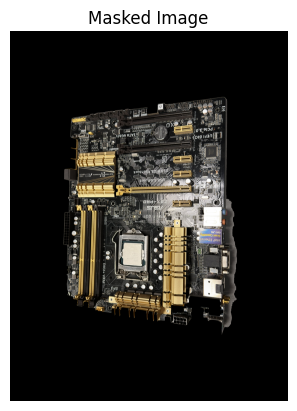

In [18]:
# Apply the mask back to the original image
masked_image = cv.bitwise_and(image, image, mask=mask)

# Show the image
ObjectMasking.plot_cv_image(masked_image, title="Masked Image")